In [131]:

import MetaTrader5 as mt5
import pandas as pd
import datetime
import mplfinance as mpf
import pandas_ta as pta
import numpy as np
from ta.momentum import RSIIndicator


if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [34]:
test_data = pd.read_csv("test.csv")

test_data["test1"] = test_data.open <= test_data.shift(1).close

test_data["test2"] = test_data.close >= test_data.shift(1).open


In [43]:
test_data.head(8)[["local_time", "open", "close", "test1", "test2", "cdl_up", "cdl_bullish_engulfing"]]

,local_time,open,close,test1,test2,cdl_up,cdl_bullish_engulfing
0,2023-12-20 10:50:00,4773.19,4770.89,False,False,False,False
1,2023-12-20 10:45:00,4773.39,4772.89,False,False,False,False
2,2023-12-20 10:40:00,4772.19,4773.69,True,True,True,True
3,2023-12-20 10:35:00,4772.89,4772.39,True,True,False,False
4,2023-12-20 10:30:00,4770.39,4773.19,True,True,True,False
5,2023-12-20 10:25:00,4770.19,4770.19,True,False,False,False
6,2023-12-20 10:20:00,4769.19,4769.89,True,False,True,True
7,2023-12-20 10:15:00,4769.39,4769.39,True,True,False,False


In [162]:
symbol = "SP500"
data = pd.DataFrame(mt5.copy_rates_from_pos(
            symbol,
            mt5.TIMEFRAME_M5,
            0,
            200
        ))

data["time"] = pd.to_datetime(data["time"], unit="s")

# convert to local time
seven_hours = datetime.timedelta(hours=7)
data["Date"] = data["time"] - seven_hours
data["local_time"] = data["time"] - seven_hours


# apply indicators before we sort and reset index
rsi_indicator = RSIIndicator(
            close=data["close"],
            window=5,                   # 14 is default, 9 will give more signals
            )
data["rsi"] = rsi_indicator.rsi()



# create index
data = data.set_index("Date")
data.sort_index(ascending=False, inplace=True)

# we want to make sure that the most recent candle has index = 0
data.reset_index(inplace=True)


#data["test1"] = test_data.open <= test_data.shift(-1).close

#data["test2"] = test_data.close >= test_data.shift(-1).open


append_cdl_patterns(data)


# sort ascending for chart
chart_data = data.sort_index( ascending=True, inplace=False)
chart_data.set_index("Date", inplace=True)

focus_data = data
focus_data.set_index("Date", inplace=True)


C:\Users\micha\AppData\Local\Temp\ipykernel_16820\2168250732.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,"cdl_bullish_engulfing"] = is_bullish_engulfing
C:\Users\micha\AppData\Local\Temp\ipykernel_16820\2168250732.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,"cdl_bearish_engulfing"] = is_bearish_engulfing
C:\Users\micha\AppData\Local\Temp\ipykernel_16820\2168250732.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,"is_up_tren

In [128]:
data


,Date,time,open,high,low,close,tick_volume,spread,real_volume,local_time,rsi,test1,test2,cdl_size,cdl_up,prev_rsi,cdl_bullish_engulfing,cdl_bearish_engulfing,is_up_trend,is_down_trend
0,2023-12-20 11:25:00,2023-12-20 18:25:00,4772.69,4773.19,4771.39,4771.39,50,45,0,2023-12-20 11:25:00,47.295809,False,False,-1.3,False,64.031688,False,False,False,False
1,2023-12-20 11:20:00,2023-12-20 18:20:00,4772.89,4773.39,4772.19,4772.89,67,45,0,2023-12-20 11:20:00,64.031688,True,True,0.0,False,62.620827,False,False,False,False
2,2023-12-20 11:15:00,2023-12-20 18:15:00,4769.89,4772.69,4769.69,4772.69,66,45,0,2023-12-20 11:15:00,62.620827,True,True,2.8,True,41.515444,True,False,False,True
3,2023-12-20 11:10:00,2023-12-20 18:10:00,4770.39,4772.19,4770.19,4770.39,109,45,0,2023-12-20 11:10:00,41.515444,True,True,0.0,False,44.114580,False,False,False,False
4,2023-12-20 11:05:00,2023-12-20 18:05:00,4772.39,4772.89,4770.39,4770.69,91,45,0,2023-12-20 11:05:00,44.114580,False,True,-1.7,False,58.852870,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-12-19 19:10:00,2023-12-20 02:10:00,4765.83,4766.33,4765.83,4766.03,13,45,0,2023-12-19 19:10:00,65.217391,NaN,NaN,0.2,True,NaN,True,False,False,False
196,2023-12-19 19:05:00,2023-12-20 02:05:00,4766.03,4766.33,4766.03,4766.03,7,45,0,2023-12-19 19:05:00,NaN,NaN,NaN,0.0,False,NaN,False,False,False,False
197,2023-12-19 19:00:00,2023-12-20 02:00:00,4765.33,4765.83,4765.03,4765.83,20,45,0,2023-12-19 19:00:00,NaN,NaN,NaN,0.5,True,NaN,False,False,False,False
198,2023-12-19 18:55:00,2023-12-20 01:55:00,4765.33,4765.33,4765.03,4765.03,4,45,0,2023-12-19 18:55:00,NaN,NaN,NaN,-0.3,False,NaN,False,False,False,False


In [161]:
def append_cdl_patterns(data):
    data["cdl_size"] = data["close"] - data["open"]
    data["cdl_up"] = np.where(data["cdl_size"] > 0, True, False)


    for index, current_cdl in data.iterrows():
        is_bullish_engulfing = False
        is_bearish_engulfing = False
        is_down_trend = False
        is_up_trend = False
        #print(row[["local_time"]])   
        
        #data.at[index, "TR"] = max([row.high - row.low, abs(row.high - data.iloc[index-1].close), abs(row.low - data.iloc[index-1].close)]) 
        # ignore the last x rows otherwise we get index out of range 
        if index+3 in data.index:
            if data.iloc[index+1].cdl_up and data.iloc[index+2].cdl_up and data.iloc[index+3].cdl_up:
                is_up_trend = True 
        
            #data.at[index, "prev1_up"] = data.iloc[index+1].cdl_up
            #data.at[index, "prev2_up"] = data.iloc[index+2].cdl_up
            #data.at[index, "prev3_up"] = data.iloc[index+3].cdl_up
            
            #data.at[index, "prev1_time"] = data.iloc[index+1].local_time
            #data.at[index, "prev2_time"] = data.iloc[index+2].local_time
        
            if data.iloc[index+1].cdl_up == False and data.iloc[index+2].cdl_up == False and data.iloc[index+3].cdl_up == False :
                is_down_trend = True

        
            previous_cdl = data.iloc[index+1]
            #print("-- RSI", previous_cdl["rsi"])
            if (current_cdl.open <= previous_cdl.close and
                    current_cdl.close >= previous_cdl.open and
                    current_cdl.cdl_up == True and
                    previous_cdl.cdl_up == False #and
                    #previous_cdl.rsi <= 35
            ):
        
                is_bullish_engulfing = True
                
        
            if (current_cdl.close <= previous_cdl.open and
                    current_cdl.open >= previous_cdl.close and
                     current_cdl.cdl_up == False and
                    previous_cdl.cdl_up == True 
                
                #previous_cdl.rsi >= 65
            ):
        
                is_bearish_engulfing = True
            

        #data.at[index,"down_trend"] = is_down_trend
        #data.at[index,"up_trend"] = is_up_trend
        data.at[index,"prev_rsi"] = previous_cdl.rsi
        data.at[index,"cdl_bullish_engulfing"] = is_bullish_engulfing
        data.at[index,"cdl_bearish_engulfing"] = is_bearish_engulfing
        data.at[index,"is_up_trend"] = is_up_trend
        data.at[index,"is_down_trend"] = is_down_trend

            
    #data.to_csv("test.csv")
    #print(data)

C:\Users\micha\AppData\Local\Temp\ipykernel_16820\1067798684.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,"cdl_bullish_engulfing"] = is_bullish_engulfing
C:\Users\micha\AppData\Local\Temp\ipykernel_16820\1067798684.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,"cdl_bearish_engulfing"] = is_bearish_engulfing
C:\Users\micha\AppData\Local\Temp\ipykernel_16820\1067798684.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index,"is_up_tre

In [137]:

data

,Date,time,open,high,low,close,tick_volume,spread,real_volume,local_time,rsi,cdl_size,cdl_up,prev_rsi,cdl_bullish_engulfing,cdl_bearish_engulfing,is_up_trend,is_down_trend
0,2023-12-20 11:30:00,2023-12-20 18:30:00,4772.19,4772.19,4769.39,4770.69,64,45,0,2023-12-20 11:30:00,40.277606,-1.5,False,51.809613,False,True,False,False
1,2023-12-20 11:25:00,2023-12-20 18:25:00,4772.69,4773.19,4770.39,4771.89,90,45,0,2023-12-20 11:25:00,51.809613,-0.8,False,64.031688,False,False,False,False
2,2023-12-20 11:20:00,2023-12-20 18:20:00,4772.89,4773.39,4772.19,4772.89,67,45,0,2023-12-20 11:20:00,64.031688,0.0,False,62.620827,False,False,False,False
3,2023-12-20 11:15:00,2023-12-20 18:15:00,4769.89,4772.69,4769.69,4772.69,66,45,0,2023-12-20 11:15:00,62.620827,2.8,True,41.515444,True,False,False,True
4,2023-12-20 11:10:00,2023-12-20 18:10:00,4770.39,4772.19,4770.19,4770.39,109,45,0,2023-12-20 11:10:00,41.515444,0.0,False,44.114580,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-12-19 19:15:00,2023-12-20 02:15:00,4766.33,4766.33,4765.53,4765.53,8,45,0,2023-12-19 19:15:00,51.811874,-0.8,False,NaN,False,True,False,False
196,2023-12-19 19:10:00,2023-12-20 02:10:00,4765.83,4766.33,4765.83,4766.03,13,45,0,2023-12-19 19:10:00,NaN,0.2,True,NaN,True,False,False,False
197,2023-12-19 19:05:00,2023-12-20 02:05:00,4766.03,4766.33,4766.03,4766.03,7,45,0,2023-12-19 19:05:00,NaN,0.0,False,NaN,False,False,False,False
198,2023-12-19 19:00:00,2023-12-20 02:00:00,4765.33,4765.83,4765.03,4765.83,20,45,0,2023-12-19 19:00:00,NaN,0.5,True,NaN,False,False,False,False


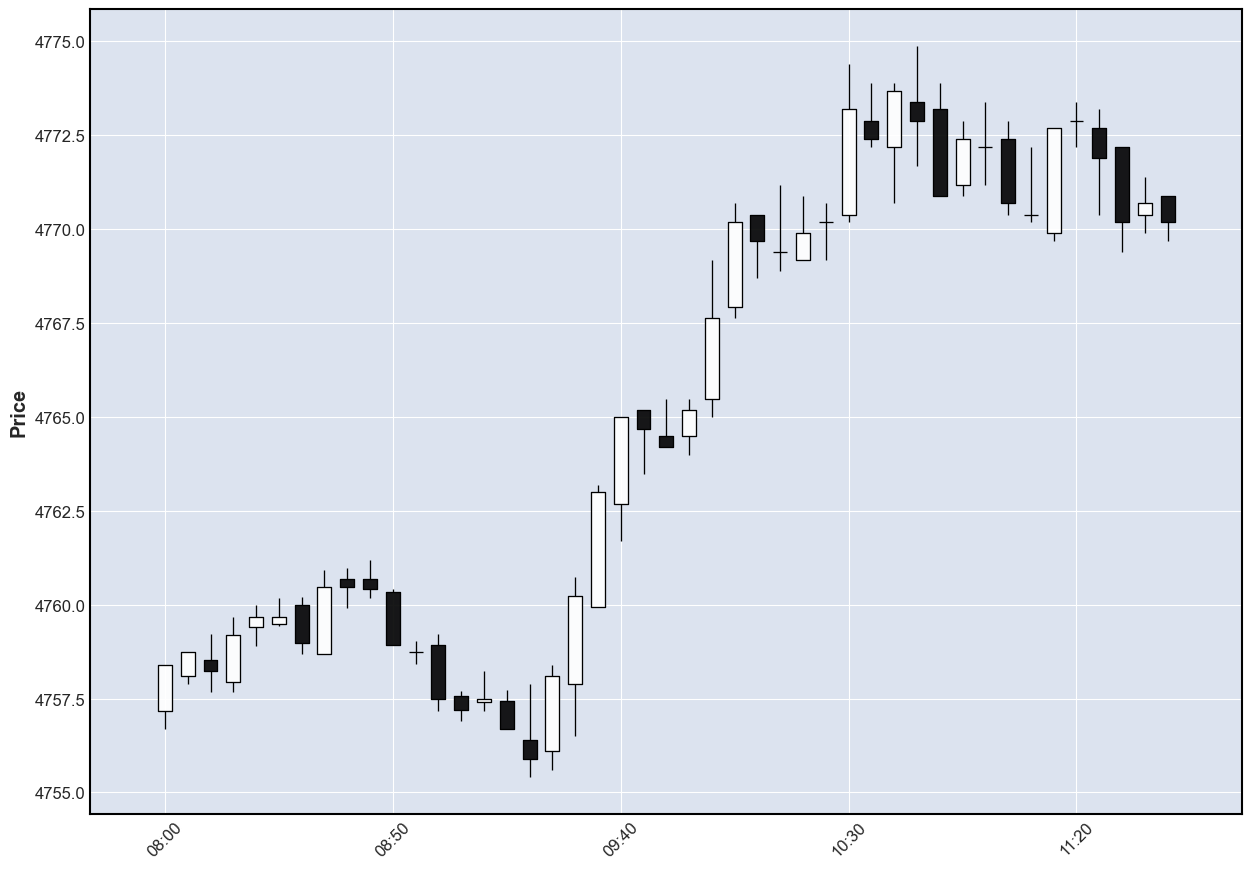

In [164]:

# let's isolate a case where we want to open a trade
focus_data =  data.between_time('8:00', '11:40')

focus_data = focus_data.sort_index(ascending=True)
mpf.plot(focus_data, type="candle", figscale=2.0)


In [124]:

#data["test1"] = test_data.open <= test_data.shift(1).close
#data["test2"] = test_data.close >= test_data.shift(1).open

output_data["prev_close"] = output_data.shift(-1).close
output_data["prev_open"] = output_data.shift(-1).open

output_data.head(2)[["local_time", "open", "close", "test1", "test2", "cdl_bullish_engulfing", "prev_close"]]

,local_time,open,close,test1,test2,cdl_bullish_engulfing,prev_close
Date,,,,,,,
2023-12-20 09:40:00,2023-12-20 09:40:00,4762.69,4764.99,False,True,True,4762.99
2023-12-20 09:35:00,2023-12-20 09:35:00,4759.93,4762.99,False,False,True,4760.23


In [248]:

# TR = Max of high - low or high - previous close or low - previous close
print("append TR")
data["TR"] = 0
for index, row in data.iterrows():
#    print(row[["local_time"]])   
    data.at[index, "TR"] = max([row.high - row.low, abs(row.high - data.iloc[index-1].close), abs(row.low - data.iloc[index-1].close)]) 




print(data.head(5)[["local_time", "open", "close", "low", "high", "TR"]])



In [249]:

focus_data["cndl_body_size"] = focus_data["Close"] - focus_data["Open"]
focus_data["cndl_direction"] = focus_data.apply(set_cndl_up_or_down, axis=1)
focus_data

C:\Users\micha\AppData\Local\Temp\ipykernel_16832\2222612621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_data["cndl_body_size"] = focus_data["Close"] - focus_data["Open"]
C:\Users\micha\AppData\Local\Temp\ipykernel_16832\2222612621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_data["cndl_direction"] = focus_data.apply(set_cndl_up_or_down, axis=1)


,time,Open,High,Low,Close,Volume,spread,real_volume,cndl_body_size,cndl_direction
Date,,,,,,,,,,
2023-12-13 05:00:00,2023-12-13 12:00:00,2178.71,2179.19,2176.79,2178.76,438,146,0,0.05,up
2023-12-13 05:05:00,2023-12-13 12:05:00,2178.76,2180.24,2178.39,2180.09,245,146,0,1.33,up
2023-12-13 05:10:00,2023-12-13 12:10:00,2180.09,2181.52,2179.08,2181.25,232,146,0,1.16,up
2023-12-13 05:15:00,2023-12-13 12:15:00,2181.25,2181.92,2178.69,2178.78,320,146,0,-2.47,down
2023-12-13 05:20:00,2023-12-13 12:20:00,2178.78,2179.37,2175.55,2176.35,293,146,0,-2.43,down
2023-12-13 05:25:00,2023-12-13 12:25:00,2176.35,2176.47,2171.28,2172.80,240,146,0,-3.55,down
2023-12-13 05:30:00,2023-12-13 12:30:00,2172.80,2173.82,2169.80,2172.74,283,146,0,-0.06,down
2023-12-13 05:35:00,2023-12-13 12:35:00,2172.74,2178.69,2171.93,2174.75,466,146,0,2.01,up
2023-12-13 05:40:00,2023-12-13 12:40:00,2174.75,2175.83,2173.54,2174.44,220,146,0,-0.31,down


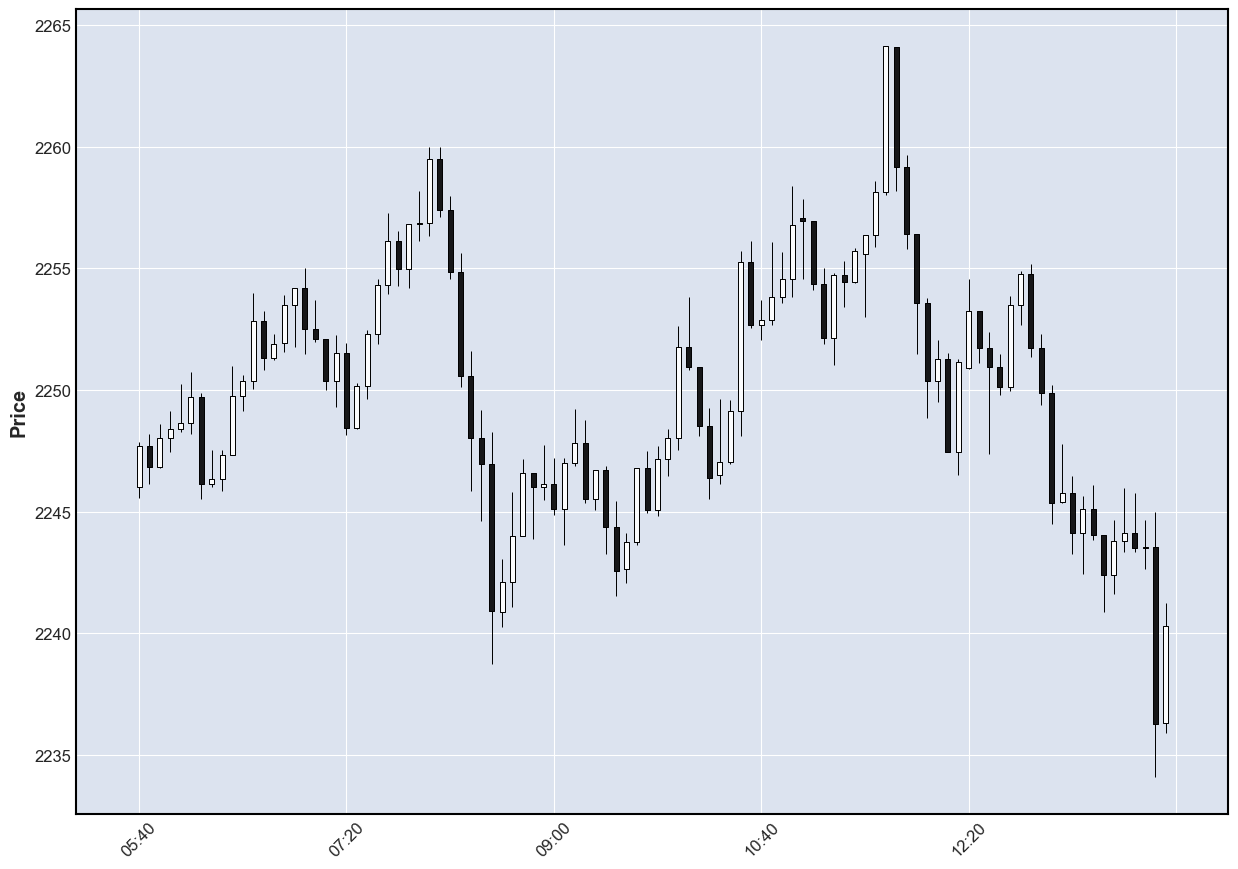

In [248]:

# upper case column names because charting library requires it 
chart_data = chart_data.rename(columns={"open": "Open", "close": "Close", "high": "High", "low": "Low", "tick_volume": "Volume"})

mpf.plot(chart_data, type="candle", figscale=2.0)
